In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

In [188]:
def rk4(freq, u0, T, n,t0=0):
    """freq -- parameter of oscillator \n
        u_0 -- initial values in form [x0, v0] \n
        T -- right border of an interval \n
        t0 -- left border of an inteval \n
        n -- number of steps
    """
    a_mat = np.array([[0, 1.], [-freq**2, 0]])
    t = np.linspace(t0, T, n)
    k = np.empty([4,2])
    dt = abs(t[0]-t[1])
    y = np.empty([2,n])
    y[:,0] = u0
    for i in range(n-1):
        k[0,:] = a_mat @ y[:,i]
        k[1,:] = a_mat @ (y[:,i] + dt * k[0,:] / 2)
        k[2,:] = a_mat @ (y[:,i] + dt * k[1,:] / 2)
        k[3,:] = a_mat @ (y[:,i] + dt * k[2,:])
        y[:,i+1] = y[:,i] + 1/6 * dt * (k[0,:] + 2 * k[2,:] + k[3,:] + 2 * k[1,:])
    return y


def rk1(freq, u0, T, n, t0=0):
    """freq -- parameter of oscillator \n
        u_0 -- initial values in form [x0, v0] \n
        T -- right border of an interval \n
        t0 -- left border of an inteval \n
        n -- number of steps
    """
    A = np.array([[0, 1.], [-freq**2, 0]])
    t = np.linspace(t0, T, n)
    dt = abs(t[0]-t[1])
    y = np.empty([2,n])
    y[:, 0] = u0
    for k in range(n-1):
        pred_step = y[:, k] + dt*A@y[:,k]/2
        y[:, k+1] = y[:, k] + dt*A@pred_step
    return y


def x_true(freq, u0, t,t0=0):
    return u0[0]*np.cos((t - t0)*fr) + (u0[1]*np.sin((t - t0)*fr))/fr

def v_true(freq, u0, t,t0=0):
    return -u0[0]*fr*np.sin((t - t0)*fr) + (u0[1]*np.cos((t - t0)*fr))

In [199]:
fr = 15
u0 = [1., 4.]
T = 10.
n = 1000
t0 = 1.
t = np.linspace(t0, T, n)
rk4th = rk4(fr, u0, T, n, t0)
rk1th = rk1(fr, u0, T, n, t0)
x4 = rk4th[0,:]
v4 = rk4th[1,:]

x1 = rk1th[0,:]
v1 = rk1th[1,:]

xtr = x_true(fr, u0, t, t0)
vtr = v_true(fr, u0, t, t0)

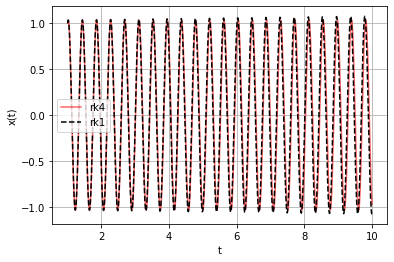

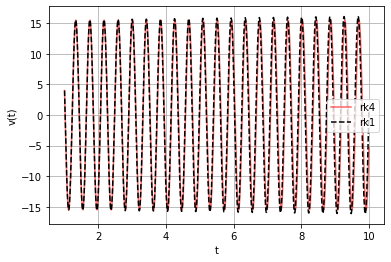

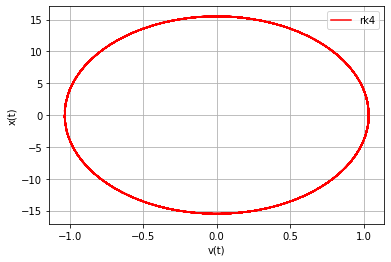

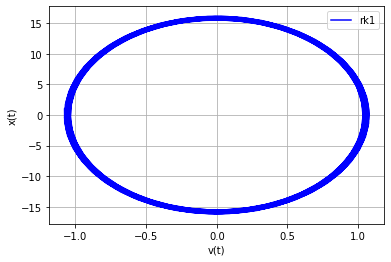

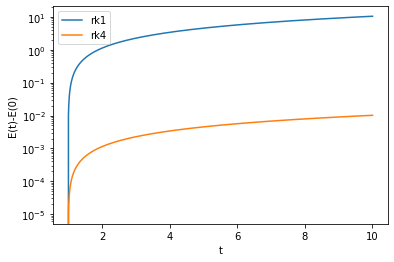

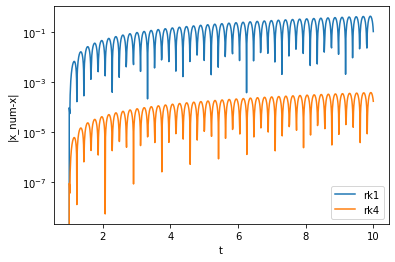

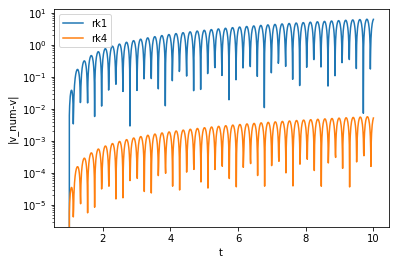

In [200]:
plt.plot(t, x4, "-", label="rk4", alpha=0.6, color ="red")
plt.plot(t, x1, "--", label="rk1", color ="black")
plt.legend()
plt.grid(True)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()


plt.plot(t, v4, "-", label="rk4", alpha=0.6, color ="red")
plt.plot(t, v1, "--", label="rk1", color ="black")
plt.legend()
plt.grid(True)
plt.xlabel("t")
plt.ylabel("v(t)")
plt.show()


plt.plot(x4, v4, "-", label="rk4", alpha=1, color ="red")
plt.legend()
plt.grid(True)
plt.xlabel("v(t)")
plt.ylabel("x(t)")
plt.show()


plt.plot(x1, v1, "-", label="rk1", color ="blue")
plt.legend()
plt.grid(True)
plt.xlabel("v(t)")
plt.ylabel("x(t)")
plt.show()


plt.plot(t,abs(v1**2/2+(fr**2)/2*x1**2-(v4[0]**2/2+(fr**2)/2*x4[0]**2)), label = "rk1")
plt.legend()
plt.plot(t,abs(v4**2/2+(fr**2)/2*x4**2-(v4[0]**2/2+(fr**2)/2*x4[0]**2)), label = "rk4")
plt.xlabel("t")
plt.ylabel("E(t)-E(0)")
plt.legend()
plt.yscale("log")
plt.show()

plt.plot(t, abs(xtr-x1), label = "rk1")
plt.plot(t, abs(xtr-x4), label = "rk4")
plt.xlabel("t")
plt.ylabel("|x_num-x|")
plt.legend()
plt.yscale("log")
plt.show()


plt.plot(t, abs(vtr-v1), label = "rk1")
plt.plot(t, abs(vtr-v4), label = "rk4")
plt.xlabel("t")
plt.ylabel("|v_num-v|")
plt.legend()
plt.yscale("log")
plt.show()


После того, как построены, кажется, все возможные графики для осциллятора скажем несколько слов о самих методах и чуть проанализируем графики:
Во-первых, из графика отклонений скоростей и координат от настоящих увидим, что на больших временах у нас РК4 намного лучше аппроксимирует настояющее движение, точность при этом выше на два-три порядка. 

Аналогичное же можно сказать и про интеграл движения. Он сохраняется намного лучше в системе более высокого порядка. 

Это же вытекает и из фазового портрета системы, который в рк4 практически не размазывается. 

Ещё можно сказать, что важно понимать, что рк4 сложнее вычислиьтельно, хотя на $T\omega\ll1$ это не будет сильно заметно

Все эти слова тривиально вытекают из того, что метод РК4 имеет точность $O(h^5)$ -- локально, а метод РК1 -- $O(h^2)$, где $h$ -- величина шага